<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout5_SimpleLinearRegression_PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #5 : Simple Linear Regression - Part B : Understanding the Standard Errors over Repeated Sampling

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 5.1

Consider data on the home prices of homes in Winona.  This data was collected using Redfin website. 
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: CurrentPrice ($) </li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>SquareFeet, the size of the home (ft^2)</li>
          <li>Bedroom, number of bedrooms in home</li>
          <li>Bathrooms, number of bathrooms in home</li>
          <li>Garage, number of vehicle stalls in garage</li>
          <li>YearBuilt, the year in which the home was built</li>
          <li>LotSize, the size of the lot (ft^2)</li>
          <li>Taxes, the amount of taxes on home ($)</li>
          <li>DaysOnMarket, the number of days this home has been on the market</li>
          <li>OriginalPrice, the original listing price of the home</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1Nl6Jmi0W15ghB9JrJxj40F-230hEwXKm" width='50%' height='50%'></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)

Redfin Data: <a href="https://www.redfin.com/city/18151/MN/Winona">Webpage</a></li>

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [2]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The **read_csv()** function is used to read in the dataset. 

In [3]:
#@title Reading in Data

# Reading data in using read.csv via Base 
WinonaHomePrices <- read_csv("http://www.StatsClass.org/stat360/Datasets/HomePrices.csv")

Rows: 207 Columns: 11

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (11): MLS, CurrentPrice, SquareFeet, Bedrooms, Bathrooms, Garage, YearBu...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



The **head()** function can be used to see the first few lines of the dataset.

In [4]:
#@title View the first few rows of data
head(WinonaHomePrices)

MLS,CurrentPrice,SquareFeet,Bedrooms,Bathrooms,Garage,YearBuilt,LotSize,Taxes,DaysonMarket,OriginalPrice
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4036305,119900,1936,3,2,2,1920,7000,1448,151,129900
4034062,73700,1696,2,1,1,1916,6860,664,245,73700
4038971,104500,1196,3,2,2,1890,7000,1216,51,104500
4034561,114900,864,2,1,2,1940,5000,1092,218,114900
4035526,215000,3300,4,3,2,2001,NA,2850,174,215000
4035472,169500,2069,4,2,2,1886,6000,1584,174,179500


## Mean over Repeated Sampling

In [5]:
BootMean=function(y,b=100){
   output.vec=rep(0,b)
   xstar=runif(length(y),0.25,1)
   plot(xstar,y,axes=F,ylab="",xlab="",xlim=c(0,1),type="n")
   axis(2)
   #points(xstar,y)
   rug(mean(y),ticksize=0.25,side=2)
   points(xstar,y,col="white")

   for(i in 1:b){
      xstar=runif(length(y),0.25,1)     
      ystar=sample(y,size=length(y),replace=TRUE)
      output.vec[i]=mean(ystar)
      #points(xstar,ystar)
      rug(output.vec[i],ticksize=0.25,side=2)
      points(xstar,ystar,col="white")   
   }
   return(output.vec)
}


[1] 139655.1 135907.1 143926.8 134066.9 138290.2 128926.4 138467.5 130299.3
 [9] 134745.3 142104.0

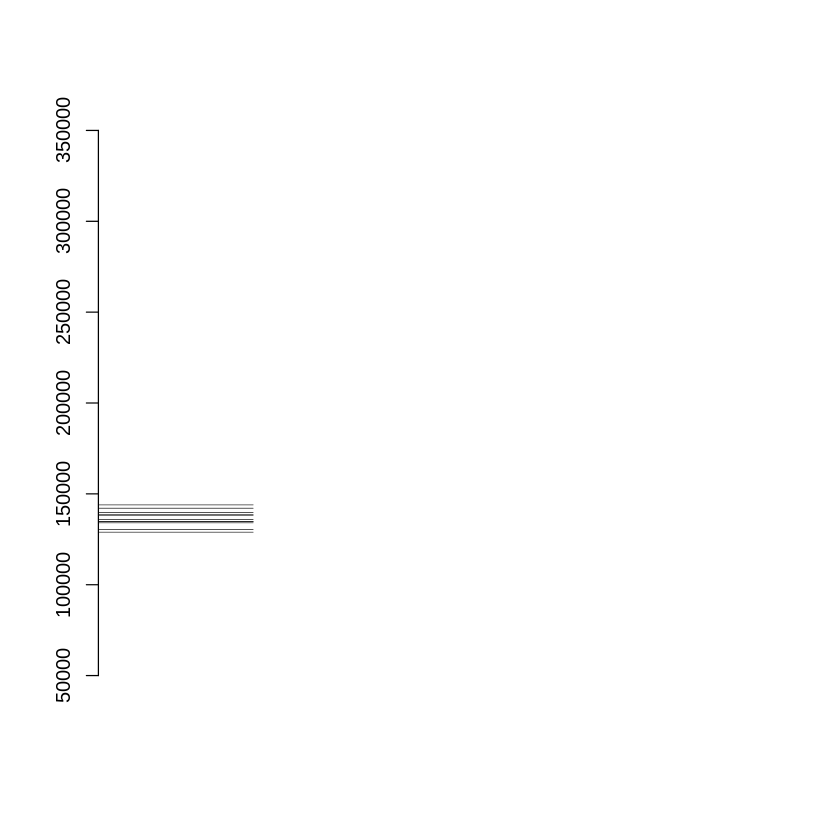

In [6]:
BootMean(WinonaHomePrices$CurrentPrice, b=10)

## Slope over Repeated Sampling

In [7]:
#######################################################
# Bootstrap Regression
# Note: bootstrapping residuals here
#######################################################

BootReg=function(slr_object,b=100,delay=0){

	y=slr_object$model[,1]
	x=slr_object$model[,2]
	resid=slr_object$residuals

	output.mat=matrix(0,b,4)
	
	plot(x,y,type="n",xlab="SquareFeet",ylab="CurrentPrice")
	#points(x,y)
	abline(slr_object)
	Sys.sleep(2+delay)
	points(x,y,col="white")


	for(i in 1:b){

		residstar = sample(resid,replace=F)
		ystar=y+residstar
		lmtemp = lm(ystar~x)
		#points(x,ystar)
		abline(lmtemp,col="grey")
		xjitter1=min(x)+0.67*(max(x)-min(x))+runif(1,-0.2*(max(x)-min(x)),0.2*(max(x)-min(x)))
		xjitter2=xjitter1 + 0.1*(max(x)-min(x))
		segments(xjitter1,+lmtemp$coefficients[[1]]+xjitter1*lmtemp$coefficients[[2]],xjitter2,lmtemp$coefficients[[1]]+xjitter1*lmtemp$coefficients[[2]])
		segments(xjitter2,lmtemp$coefficients[[1]]+xjitter1*lmtemp$coefficients[[2]],xjitter2,lmtemp$coefficients[[1]]+xjitter2*lmtemp$coefficients[[2]])
		text(xjitter2+0.02*(max(x)-min(x)),lmtemp$coefficients[[1]]+xjitter1*lmtemp$coefficients[[2]],round(lmtemp$coefficients[[2]],2),cex=0.75)
		Sys.sleep(delay)
		points(x,ystar,col="white")
		
		output.mat[i,1]=lmtemp$coefficients[[1]]
		output.mat[i,2]=lmtemp$coefficients[[2]]
		
	}
	
	Intercept = output.mat[,1]
	Slope = output.mat[,2]
	return(data.frame(Intercept, Slope))
}


First, get a model object

In [8]:
WinonaHomePrices_Model <- lm(CurrentPrice ~ SquareFeet, data=WinonaHomePrices)

Using the BootReg() function to get the slopes over repeated sampling

Intercept,Slope
<dbl>,<dbl>
50906.95,44.34069
46918.81,46.44621
36182.95,52.11414
46299.58,46.77313
52216.56,43.64929
40580.28,49.79260
42819.45,48.61044
42941.35,48.54608
49613.86,45.02337


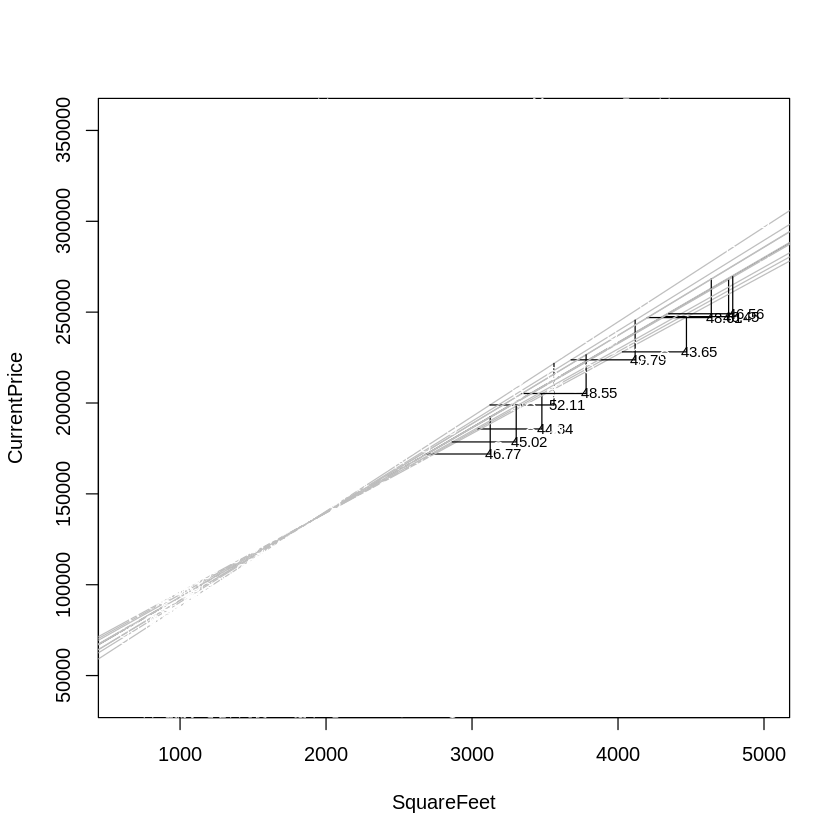

In [10]:
BootReg(WinonaHomePrices_Model, b=10)

End of Document